# Multi Dimensional Scaling (MDS) and Isomap

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from scipy.stats import expon
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression, LogisticRegression
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances

np.random.seed(42)

## MDS implementation

In [2]:
def MDS(D, d):
    n = len(D)

    d_1i = np.repeat(np.reshape(D[0,:],(n,1)),n,axis=1)
    d_1j = np.repeat(np.reshape(D[0,:],(1,n)),n,axis=0)
    
    S = 1/2*(np.square(d_1i) + np.square(d_1j) - np.square(D))
    
    
    #print(1/2*(D[1,19]**2 + D[1,4]**2 - D[19,4]**2))
    #print(S[19,4])
    
    eigen_values, eigen_vectors = np.linalg.eig(S)
    
    
    descending_order = np.argsort(eigen_values)[::-1]
    sorted_eigen_values = eigen_values[descending_order]
    sorted_eigen_vectors = eigen_vectors[descending_order]
    
    
    d_largest_vectors = sorted_eigen_vectors[:,:d]
    d_largest_values = sorted_eigen_values[:d]
    
    d_largest_values_roots = np.sqrt(d_largest_values)
    Lambda = np.multiply(np.eye(d),np.repeat(np.reshape(d_largest_values_roots,(1,d)),d,axis=0))
    
    
    X_embedded = np.dot(d_largest_vectors,Lambda)
    return X_embedded

### Dataset of european city distances (not euclidean) 

In [3]:
eurocity_dataframe = pd.read_csv('eurodist.csv', index_col=0, header=0)
eurocity_dataframe

,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,2977,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,2018,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
Brussels,2963,1318,0,204,583,206,966,677,2256,597,...,2084,690,1558,1011,925,747,285,1511,1616,1175
Calais,3175,1326,204,0,460,409,1136,747,2224,714,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
Cherbourg,3339,1294,583,460,0,785,1545,853,2047,1115,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
Cologne,2762,1498,206,409,785,0,760,1662,2436,460,...,2290,714,1764,1035,911,583,465,1497,1403,937
Copenhagen,3276,2218,966,1136,1545,760,0,1418,3196,460,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
Geneva,2610,803,677,747,853,1662,1418,0,1975,1118,...,1936,158,1439,425,328,591,513,995,2068,1019
Gibraltar,4485,1172,2256,2224,2047,2436,3196,1975,0,2897,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
Hamburg,2977,2018,597,714,1115,460,460,1118,2897,0,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


In [4]:
distance_matrix = eurocity_dataframe.as_matrix()
X_embedded = MDS(distance_matrix, 2)

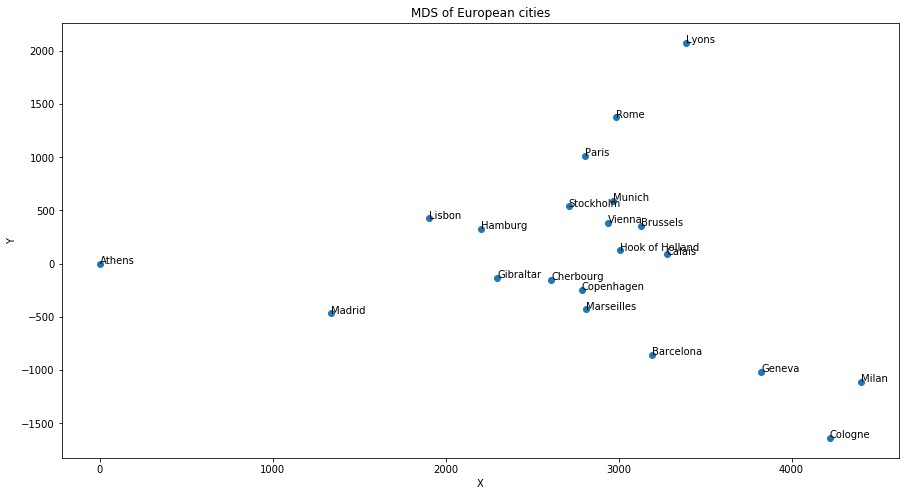

In [5]:
names = eurocity_dataframe.columns.values
f, ax = plt.subplots(1, 1, figsize = (15,8))

ax.scatter(X_embedded[:,0], X_embedded[:,1])


for i,name in enumerate(names):
      ax.annotate(name, (X_embedded[i,0],X_embedded[i,1]))

ax.set_title("MDS of European cities")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

### Dataset UPS

In [11]:
train_df = pd.read_csv('USPS.csv', sep='\t',)
X = train_df.drop(['Label'], axis=1).as_matrix()
y = train_df['Label'].as_matrix()
idx = np.any([y == 0, y == 3, y == 6, y == 9], axis=0)
X = X[idx]
y = y[idx]

In [12]:
D = euclidean_distances(X)
X_embedded = MDS(D, 2)

/Users/paule/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


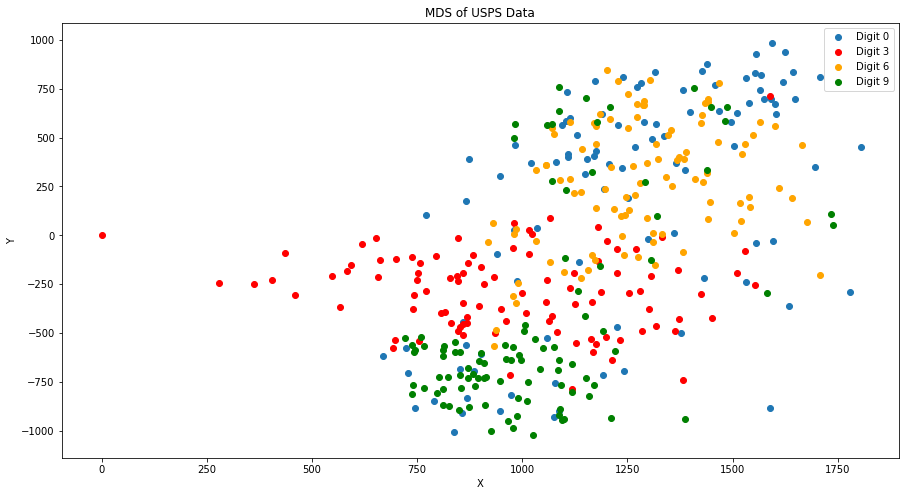

In [13]:
names = y
class_0 = X_embedded[np.where(names==0)]
class_3 = X_embedded[np.where(names==3)]
class_6 = X_embedded[np.where(names==6)]
class_9 = X_embedded[np.where(names==9)]

f, ax = plt.subplots(1, 1, figsize = (15,8))

ax.scatter(class_0[:,0], class_0[:,1], label = "Digit 0")
ax.scatter(class_3[:,0], class_3[:,1],  color = "red", label = "Digit 3")
ax.scatter(class_6[:,0], class_6[:,1],  color = "orange", label = "Digit 6")
ax.scatter(class_9[:,0], class_9[:,1],  color = "green", label = "Digit 9")

ax.legend()
ax.set_title("MDS of USPS Data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

## Isomap implementation

In [14]:
def isomap(D, k, d):
    n = len(D)
    
    K_nearest_neighbors = np.argsort(D,axis = 1)[:,1:k+1]  
    K_nearest_distances = np.sort(D,axis = 1)[:,1:k+1]
    
    Edges = np.repeat(np.reshape(np.arange(n),(n,1)),k, axis = 1)
    Edges = np.dstack((Edges,K_nearest_neighbors))
    
    G=nx.Graph()
    
    for i,row in enumerate(Edges):
        for j,col in enumerate(row):
            e = tuple(col)
            weight = K_nearest_distances[i,j]
            G.add_edge(*e,weight=weight)
    
    
    geo_D = np.zeros((400,400))
    length = dict(nx.all_pairs_dijkstra_path_length(G))
    
    for i in range(400):
        for j in range(400):
            geo_D[i,j] = length[i][j]
    
    X_embedded = MDS(geo_D, d)
    return X_embedded 

### Apply to UPS dataset

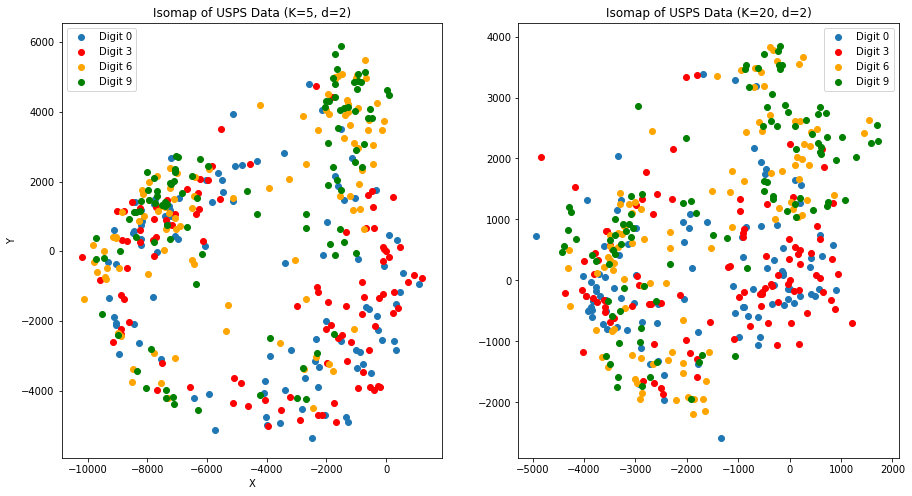

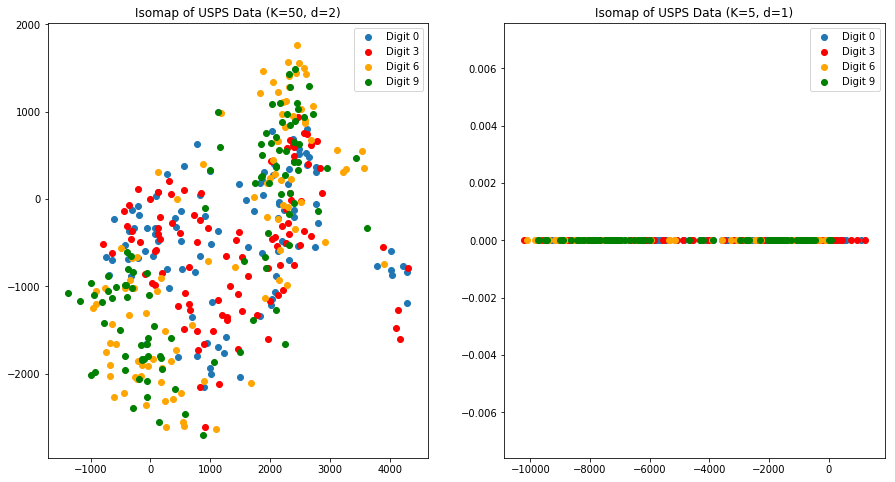

In [15]:
f1, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,8))
f2, (ax3,ax4) = plt.subplots(1, 2, figsize = (15,8))

X_embedded_5 = isomap(D, 5, 2)
X_embedded_20 = isomap(D, 20, 2)
X_embedded_50 = isomap(D, 50, 2)
X_embedded_5_1 = isomap(D, 5, 1)


class5_0 = X_embedded_5[np.where(names==0)]
class5_3 = X_embedded_5[np.where(names==3)]
class5_6 = X_embedded_5[np.where(names==6)]
class5_9 = X_embedded_5[np.where(names==9)]

class20_0 = X_embedded_20[np.where(names==0)]
class20_3 = X_embedded_20[np.where(names==3)]
class20_6 = X_embedded_20[np.where(names==6)]
class20_9 = X_embedded_20[np.where(names==9)]

class50_0 = X_embedded_50[np.where(names==0)]
class50_3 = X_embedded_50[np.where(names==3)]
class50_6 = X_embedded_50[np.where(names==6)]
class50_9 = X_embedded_50[np.where(names==9)]

class5_1_0 = X_embedded_5_1[np.where(names==0)]
class5_1_3 = X_embedded_5_1[np.where(names==3)]
class5_1_6 = X_embedded_5_1[np.where(names==6)]
class5_1_9 = X_embedded_5_1[np.where(names==9)]



ax1.scatter(class5_0[:,0], class5_0[:,1], label = "Digit 0")
ax1.scatter(class5_3[:,0], class5_3[:,1],  color = "red", label = "Digit 3")
ax1.scatter(class5_6[:,0], class5_6[:,1],  color = "orange", label = "Digit 6")
ax1.scatter(class5_9[:,0], class5_9[:,1],  color = "green", label = "Digit 9")

ax2.scatter(class20_0[:,0], class20_0[:,1], label = "Digit 0")
ax2.scatter(class20_3[:,0], class20_3[:,1],  color = "red", label = "Digit 3")
ax2.scatter(class20_6[:,0], class20_6[:,1],  color = "orange", label = "Digit 6")
ax2.scatter(class20_9[:,0], class20_9[:,1],  color = "green", label = "Digit 9")

ax3.scatter(class50_0[:,0], class50_0[:,1], label = "Digit 0")
ax3.scatter(class50_3[:,0], class50_3[:,1],  color = "red", label = "Digit 3")
ax3.scatter(class50_6[:,0], class50_6[:,1],  color = "orange", label = "Digit 6")
ax3.scatter(class50_9[:,0], class50_9[:,1],  color = "green", label = "Digit 9")


ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_title("Isomap of USPS Data (K=5, d=2)")
ax2.set_title("Isomap of USPS Data (K=20, d=2)")
ax3.set_title("Isomap of USPS Data (K=50, d=2)")


ax1.set_xlabel("X")
ax1.set_ylabel("Y")


ax4.set_title("Isomap of USPS Data (K=5, d=1)")

ax4.scatter(class5_1_0,np.zeros(len(class5_1_0)), label = "Digit 0")
ax4.scatter(class5_1_3,np.zeros(len(class5_1_3)), color = "red", label = "Digit 3")
ax4.scatter(class5_1_6,np.zeros(len(class5_1_6)), color = "orange", label = "Digit 6")
ax4.scatter(class5_1_9,np.zeros(len(class5_1_9)), color = "green", label = "Digit 9")

ax4.legend()


plt.show()

All of the embeddings seems kind of messy, but the most reasonable to use for clustering algorithms seems to be the isomap with $K=50$. In the case of $d=1$ the data is embedded in a line. In this case the data mapped to intervals but this is not a desirable manifold for our data. 